In [35]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

In [10]:
# index_colでインデックスにするカラムを指定｡
# parse_datesで日付としてパースするカラムを指定
hw2021 = pd.read_csv("hwdata_2021.csv", index_col="end_date", parse_dates=[1])
hw2020 = pd.read_csv("hwdata_2020.csv", index_col="end_date", parse_dates=[1])
hw2019 = pd.read_csv("hwdata_2019.csv", index_col="end_date", parse_dates=[1])
hw2018 = pd.read_csv("hwdata_2018.csv", index_col="end_date", parse_dates=[1])
hw2017 = pd.read_csv("hwdata_2017.csv", index_col="end_date", parse_dates=[1])
hw2016 = pd.read_csv("hwdata_2016.csv", index_col="end_date", parse_dates=[1])
hw2022 = pd.read_csv("hwdata_2022.csv", index_col="end_date", parse_dates=[1])
hwold = pd.read_csv("hwdata_old.csv", index_col="end_date", parse_dates=[1])

In [16]:
# def update_delta(df_list):
#    f_daydelta = lambda x: datetime.timedelta(x)
#    df["days"] = df["days"].map(f_daydelta)
#    return df

#for df in (hw2022, hw2021, hw2020, hw2019, hw2018, hw2017, hw2016):
#    update_delta(df)
hw2021.index

DatetimeIndex(['2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
               '2021-02-01', '2021-02-08', '2021-02-15', '2021-02-22',
               '2021-03-01', '2021-03-08', '2021-03-15', '2021-03-22',
               '2021-03-29', '2021-04-05', '2021-04-12', '2021-04-19',
               '2021-04-26', '2021-05-10', '2021-05-17', '2021-05-24',
               '2021-05-31', '2021-06-07', '2021-06-14', '2021-06-21',
               '2021-06-28', '2021-07-05', '2021-07-12', '2021-07-19',
               '2021-07-26', '2021-08-02', '2021-08-09', '2021-08-16',
               '2021-08-23', '2021-08-30', '2021-09-06', '2021-09-13',
               '2021-09-20', '2021-09-27', '2021-10-04', '2021-10-11',
               '2021-10-18', '2021-10-25', '2021-11-01', '2021-11-08',
               '2021-11-15', '2021-11-22', '2021-11-29', '2021-12-06',
               '2021-12-13', '2021-12-20', '2021-12-27'],
              dtype='datetime64[ns]', name='end_date', freq=None)

In [17]:
hw_all = pd.concat([hw2016, hw2017, hw2018, hw2019, hw2020, hw2021, hw2022], axis=0).drop("begin_date", axis=1)

In [25]:
hw2 = pd.concat([hwold, hw2016,hw2017, hw2018, hw2019, hw2020, hw2021, hw2022], axis=0)

In [29]:
hw3 = hw2.drop("begin_date", axis=1)

In [30]:
hw_sum = hw3.cumsum()

In [107]:
xticks_list=[]
for y in range(2001, 2022):
    xticks_list.append(datetime.datetime(y, 1, 1, 0, 0, 0))
    
xticks_list

[datetime.datetime(2001, 1, 1, 0, 0),
 datetime.datetime(2002, 1, 1, 0, 0),
 datetime.datetime(2003, 1, 1, 0, 0),
 datetime.datetime(2004, 1, 1, 0, 0),
 datetime.datetime(2005, 1, 1, 0, 0),
 datetime.datetime(2006, 1, 1, 0, 0),
 datetime.datetime(2007, 1, 1, 0, 0),
 datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0),
 datetime.datetime(2010, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2013, 1, 1, 0, 0),
 datetime.datetime(2014, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2021, 1, 1, 0, 0)]

In [37]:
current_figsize = mpl.rcParams['figure.figsize']
print(current_figsize)
plt.figure()

[6.0, 4.0]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='end_date'>

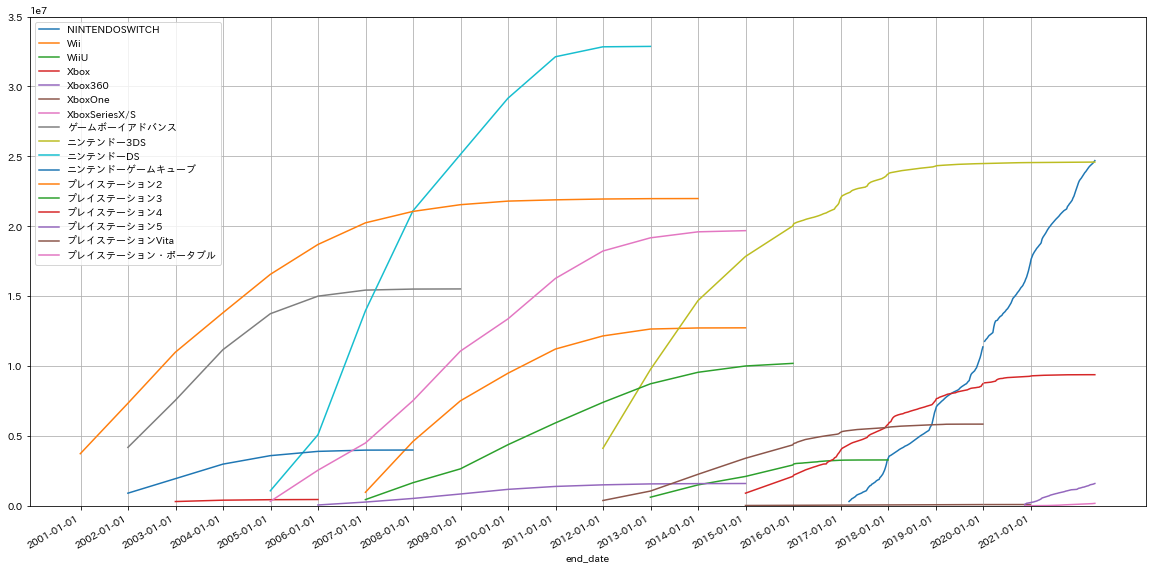

In [110]:
hw_sum.plot(figsize=(20, 10), grid=True, kind="line", ylim=[0, 35000000], xticks=xticks_list)

<AxesSubplot:xlabel='end_date'>

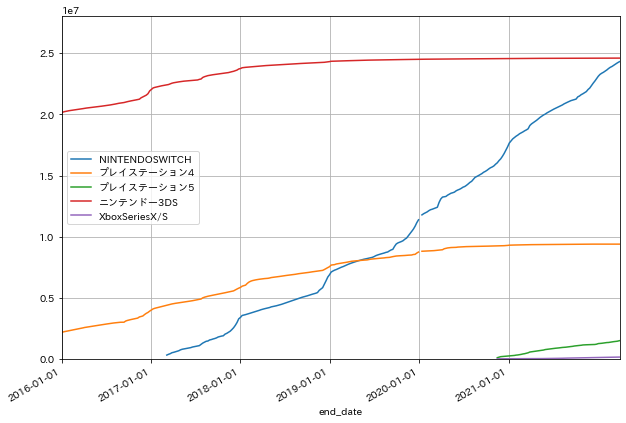

In [136]:
recent_x = [datetime.datetime(2016, 1, 1), datetime.datetime(2022, 3, 31)]
geneki = hw_sum[["NINTENDOSWITCH", "プレイステーション4", "プレイステーション5", "ニンテンドー3DS", "XboxSeriesX/S"]]
geneki.plot(figsize=(10, 7), grid=True, kind="line", ylim=[0, 28000000], xticks=xticks_list, xlim=recent_x)

<AxesSubplot:xlabel='end_date'>

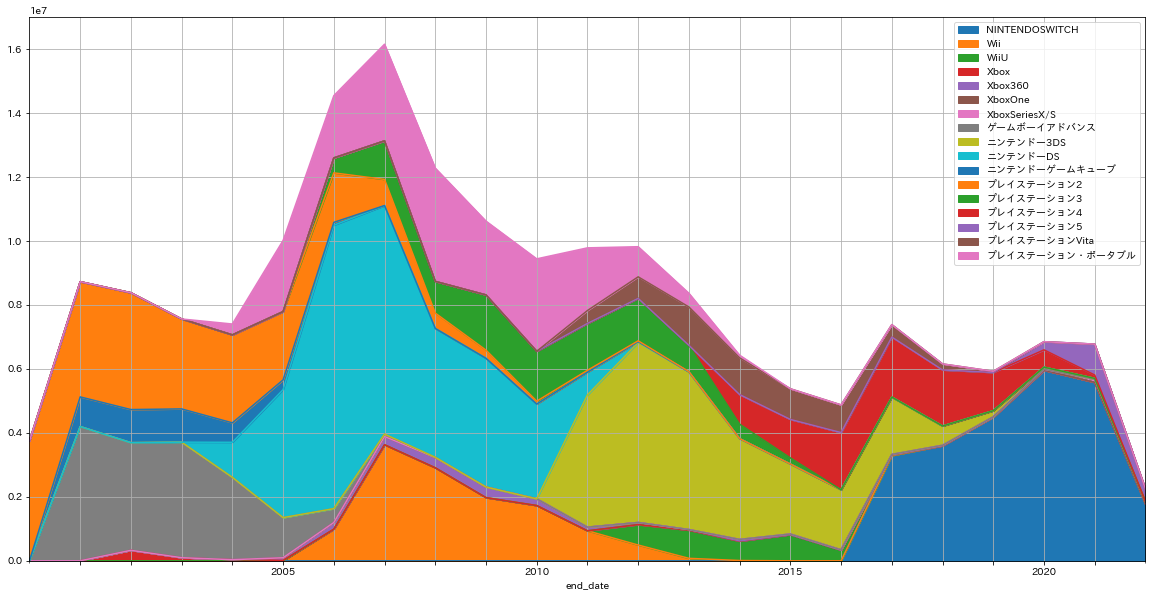

In [109]:
hw_year = hw3.resample('Y').sum()
hw_year.plot(figsize=(20,10), grid=True, kind="area", xticks=xticks_list, ylim=[0, 17000000])

In [59]:
hw_year["nintendo"] = hw_year["NINTENDOSWITCH"] + hw_year["Wii"] + hw_year["WiiU"] + hw_year["ゲームボーイアドバンス"] + hw_year["ニンテンドー3DS"] + hw_year["ニンテンドーDS"] + hw_year["ニンテンドーゲームキューブ"]
hw_year["sony"] = hw_year["プレイステーション2"] + hw_year["プレイステーション3"] + hw_year["プレイステーション4"] + hw_year["プレイステーション5"] + hw_year["プレイステーションVita"] + hw_year["プレイステーション・ポータブル"]
hw_year["microsoft"] = hw_year["Xbox"] + hw_year["Xbox360"] + hw_year["XboxOne"] + hw_year["XboxSeriesX/S"]

In [81]:
maker_year = hw_year[["nintendo", "sony", "microsoft"]][1:-1]

In [115]:
year_list = list(range(2001,2022))
count_list = list(range(0, 20000000, 1000000))


array([<AxesSubplot:xlabel='end_date'>, <AxesSubplot:xlabel='end_date'>,
       <AxesSubplot:xlabel='end_date'>], dtype=object)

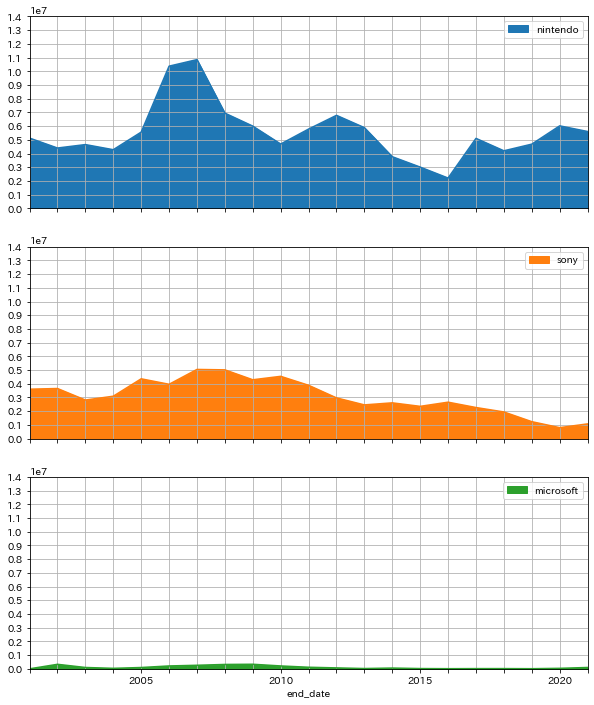

In [116]:
maker_year.plot(figsize=(10,12), grid=True, kind="area", subplots=True, sharex=True, sharey=True, xticks=xticks_list, yticks=count_list, ylim=[0, 14000000])

<AxesSubplot:xlabel='end_date'>

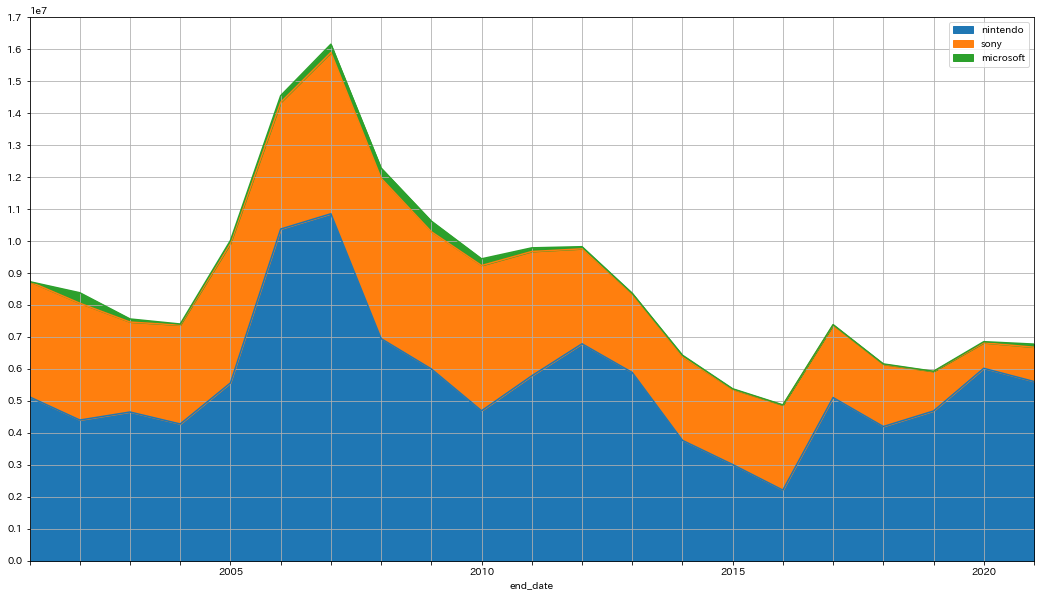

In [117]:
maker_year.plot(figsize=(18,10), grid=True, kind="area", subplots=False, sharex=True, sharey=True, xticks=xticks_list, yticks=count_list, ylim=[0, 17000000])

In [118]:
nintendo_year = hw_year[["NINTENDOSWITCH", "Wii", "WiiU", "ゲームボーイアドバンス", "ニンテンドー3DS", "ニンテンドーDS", "ニンテンドーゲームキューブ"]]
sony_year = hw_year[["プレイステーション2", "プレイステーション3", "プレイステーション4", "プレイステーション5", "プレイステーションVita", "プレイステーション・ポータブル"]]
ms_year = hw_year[["Xbox", "Xbox360", "XboxOne", "XboxSeriesX/S"]]

In [143]:
nintendo_year[1:-1].plot(figsize=(10,6), grid=True, kind="area", xticks=xticks_list, ylim=[0, 11000000])
plt.savefig('nintendo_hw.png')
plt.close('all')

In [144]:
sony_year[1:-1].plot(figsize=(10,6), grid=True, kind="area", xticks=xticks_list, ylim=[0, 11000000])
plt.savefig('sony_hw.png')
plt.close('all')

<AxesSubplot:xlabel='end_date'>

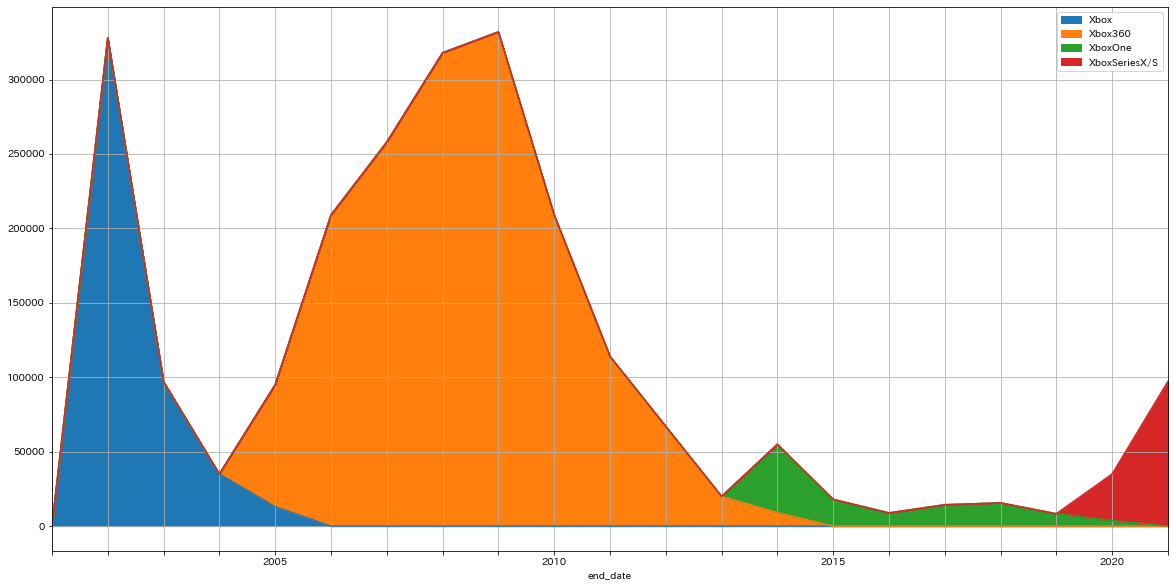

In [127]:
ms_year[1:-1].plot(figsize=(20,10), grid=True, kind="area", xticks=xticks_list)

In [115]:
t = hw_sum.index[3]
hw_all.loc[datetime.datetime(2021, 3, 27):]   # 指定した日移行

,days,ニンテンドー3DS,プレイステーションVita,WiiU,プレイステーション4,XboxOne,NINTENDOSWITCH,プレイステーション5,XboxSeriesX/S
begin_date,,,,,,,,,
2021-03-29,7 days,752,NaN,NaN,1591.0,NaN,135076.0,20755.0,159.0
2021-04-05,7 days,622,NaN,NaN,1430.0,NaN,96259.0,15560.0,571.0
2021-04-12,7 days,498,NaN,NaN,1660.0,NaN,94057.0,22095.0,545.0
2021-04-19,7 days,564,NaN,NaN,818.0,NaN,105833.0,20157.0,106.0
2021-04-26,14 days,1027,NaN,NaN,2584.0,NaN,236028.0,53640.0,1207.0
2021-05-10,7 days,495,NaN,NaN,1226.0,NaN,95411.0,14044.0,1183.0
2021-05-17,7 days,376,NaN,NaN,1298.0,NaN,99118.0,16264.0,1176.0
2021-05-24,7 days,425,NaN,NaN,2562.0,NaN,71148.0,39324.0,547.0
2021-05-31,7 days,341,NaN,NaN,2725.0,NaN,97208.0,18330.0,630.0


In [116]:
hw_all.loc['2020-6-30': '2020-11-30']  # 任意の日付で範囲指定が出来る

,days,ニンテンドー3DS,プレイステーションVita,WiiU,プレイステーション4,XboxOne,NINTENDOSWITCH,プレイステーション5,XboxSeriesX/S
begin_date,,,,,,,,,
2020-07-06,7 days,801,NaN,NaN,3425.0,35.0,96879.0,NaN,NaN
2020-07-13,7 days,903,NaN,NaN,4523.0,31.0,113197.0,NaN,NaN
2020-07-20,7 days,1042,NaN,NaN,1434.0,40.0,125231.0,NaN,NaN
2020-07-27,7 days,776,NaN,NaN,4025.0,41.0,86605.0,NaN,NaN
2020-08-03,14 days,2007,NaN,NaN,8523.0,94.0,322037.0,NaN,NaN
2020-08-17,7 days,1171,NaN,NaN,883.0,24.0,70129.0,NaN,NaN
2020-08-24,7 days,1011,NaN,NaN,1926.0,28.0,78773.0,NaN,NaN
2020-08-31,7 days,923,NaN,NaN,1816.0,29.0,77611.0,NaN,NaN
2020-09-07,7 days,849,NaN,NaN,2161.0,35.0,83920.0,NaN,NaN


In [122]:
hw_day = hw_all.resample('D')

TypeError: 'SeriesGroupBy' object is not callable

In [120]:
print(hw_day)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


In [216]:
hw_month = hw_all.resample('M').sum()

<AxesSubplot:xlabel='begin_date'>

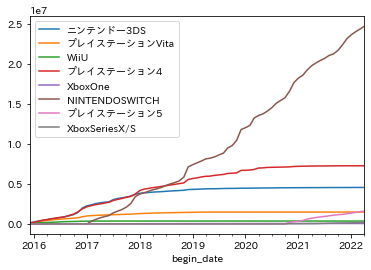

In [218]:
hw_month.cumsum().plot()

In [131]:
hw_year2=hw_year.to_period("Y")

In [225]:
hw_year2.resample('M').ffill()

,ニンテンドー3DS,プレイステーションVita,WiiU,プレイステーション4,XboxOne,NINTENDOSWITCH,プレイステーション5,XboxSeriesX/S
begin_date,,,,,,,,
2015-01,122844,78611.0,55798.0,70596.0,379.0,0.0,0.0,0.0
2015-02,122844,78611.0,55798.0,70596.0,379.0,0.0,0.0,0.0
2015-03,122844,78611.0,55798.0,70596.0,379.0,0.0,0.0,0.0
2015-04,122844,78611.0,55798.0,70596.0,379.0,0.0,0.0,0.0
2015-05,122844,78611.0,55798.0,70596.0,379.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-08,6108,0.0,0.0,281.0,0.0,1584381.0,348133.0,69471.0
2022-09,6108,0.0,0.0,281.0,0.0,1584381.0,348133.0,69471.0
2022-10,6108,0.0,0.0,281.0,0.0,1584381.0,348133.0,69471.0


In [215]:
hw_year2.asfreq('M').index

PeriodIndex(['2015-12', '2016-12', '2017-12', '2018-12', '2019-12', '2020-12',
             '2021-12', '2022-12'],
            dtype='period[M]', name='begin_date')

In [214]:
hw_year2.index

PeriodIndex(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='period[A-DEC]', name='begin_date')

In [139]:
hw_all_week = hw_all.to_period("W")

In [141]:
hw_all_week.index

PeriodIndex(['2015-12-28/2016-01-03', '2016-01-04/2016-01-10',
             '2016-01-11/2016-01-17', '2016-01-18/2016-01-24',
             '2016-01-25/2016-01-31', '2016-02-01/2016-02-07',
             '2016-02-08/2016-02-14', '2016-02-15/2016-02-21',
             '2016-02-22/2016-02-28', '2016-02-29/2016-03-06',
             ...
             '2022-02-21/2022-02-27', '2022-02-28/2022-03-06',
             '2022-03-07/2022-03-13', '2022-03-14/2022-03-20',
             '2022-03-21/2022-03-27', '2022-03-28/2022-04-03',
             '2022-04-04/2022-04-10', '2022-04-11/2022-04-17',
             '2022-04-18/2022-04-24', '2022-04-25/2022-05-01'],
            dtype='period[W-SUN]', name='begin_date', length=327)

In [142]:
hw_all.index


DatetimeIndex(['2015-12-28', '2016-01-04', '2016-01-11', '2016-01-18',
               '2016-01-25', '2016-02-01', '2016-02-08', '2016-02-15',
               '2016-02-22', '2016-02-29',
               ...
               '2022-02-21', '2022-02-28', '2022-03-07', '2022-03-14',
               '2022-03-21', '2022-03-28', '2022-04-04', '2022-04-11',
               '2022-04-18', '2022-04-25'],
              dtype='datetime64[ns]', name='begin_date', length=327, freq=None)

In [144]:
p = pd.Period(year = 2021, month = 3, day = 6, freq="7D")

In [145]:
p

Period('2021-03-06', '7D')

In [146]:
p2 = pd.Period(year = 2021, month = 3, day = 15, freq="14D")

In [149]:
p2.end_time

Timestamp('2021-03-28 23:59:59.999999999')